In [31]:
import math

math.atan2(0,2)

0.0

In [29]:
import numpy as np
import time
a = np.random.rand(10)
start = time.time()
count = 0
count2 = 0
while time.time()-start < 10:
    np.sort(a)
    count += 1
    count2 += 1
print(count/10)
#391962.9

374890.4


In [20]:
import numpy as np

a = np.array([10000001,10000002,10000003,10000004,0,0,0,0,0])
b = 10000003
a[np.nonzero(a)].shape
#print([b for b in a if b > 3])

for i in range(0,5):
    print(i)

0
1
2
3
4


In [54]:
import math

def measureStateEstimate(bb):
    pw = round((bb[2]+bb[3])/2)
    state_d = param_fov_l*param_face_diameter/pw
    px_c = round((bb[0]+(bb[2]/2.0))-(param_frame_shape[1]/2))
    state_x = state_d*px_c/param_fov_l
    py_c = round((param_frame_shape[0]/2)-(bb[1]+(bb[3]/2.0)))
    state_y = state_d*py_c/param_fov_l

    measure = (np.array([px_c,py_c,pw],dtype=int))
    measure_transformed = (np.array([state_x,state_y,state_d]))
    return measure, measure_transformed

def calculateBoundingBox(full_state,scale=1):
    if len(full_state) == 6:
        state = full_state[[0,2,4]]
    else:
        state = full_state
    px_c = state[0]*param_fov_l/state[2]
    py_c = state[1]*param_fov_l/state[2]
    pw = param_fov_l*param_face_diameter/state[2]
    diam = pw*scale
    
    print(px_c,py_c,pw)

    bb = np.zeros(4,dtype=int)
    bb[0] = int(round(px_c-(diam/2)+(param_frame_shape[1]/2)))
    #px_c-(bb[2]/2.0)+(param_frame_shape[1]/2) = bb[0]
    bb[1] = int(round(-py_c-(diam/2))+(param_frame_shape[0]/2))
    #-py_c-(bb[3]/2.0)+(param_frame_shape[0]/2) = bb[1]
    bb[2] = diam
    bb[3] = diam
    return bb

param_frame_shape = (1080,1920,3) # camera data shape

param_face_diameter = 0.16 # Meters (~6 inch)
param_tracker_buffer_length = 400
param_aov_x = math.radians(90)
param_aov_y = math.radians(50)
param_aov_d = math.radians(102)
param_fov_l_x = (param_frame_shape[1]/(2*math.tan(param_aov_x/2)))
param_fov_l_y = (param_frame_shape[0]/(2*math.tan(param_aov_y/2)))
param_fov_l = (param_fov_l_x+param_fov_l_y)/2.0

[-213  215  208]
-213.0 215.0 208.0
(747.0, 325)


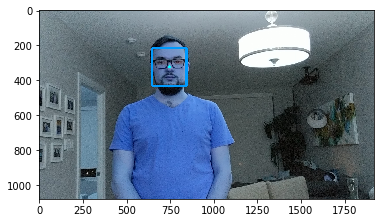

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('../data/sample_video_super_easy.mp4')
_,frame = cap.read()
frame = cv2.flip(frame, -1)

bb = np.zeros(4,dtype=int)
bb[0] = 652 
bb[1] = 212
bb[2] = 190
bb[3] = 226

measure,state = measureStateEstimate(bb)
print(measure)
bb2 = calculateBoundingBox(state)

cv2.rectangle(frame,(bb[0], bb[1]),(bb[0]+bb[2], bb[1] + bb[3]),(0,155,255),5)
cv2.rectangle(frame,(bb2[0], bb2[1]),(bb2[0]+bb2[2], bb2[1] + bb2[3]),(0,155,255),5)
cv2.circle(frame,(int(measure[0]+param_frame_shape[1]/2),int(-measure[1]+param_frame_shape[0]/2)), 5, (0,255,255), 5)
print((measure[0]+param_frame_shape[1]/2,int(-measure[1]+param_frame_shape[0]/2)))
plt.imshow(frame)


(115, 115, 3)


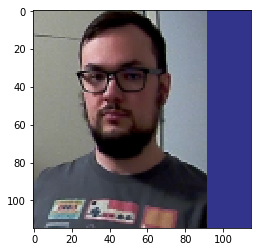

In [83]:
param_thumbnail_shape = (115,115,3)
param_thumbnail_background = np.array([139,51,50])

bb = np.array([1600,200,400,400])
c = np.zeros(4)
c[0:2] = bb[0:2]
c[2] = bb[0]+bb[2]
c[3] = bb[1]+bb[3]

# Caluclate indexs in the thumbnail that the scaled video will occupy.
# Fill remaining area with specified colour
nx = np.zeros(2,dtype=int)
nx[0] = int(round(param_thumbnail_shape[0]*((max(c[0],0)-c[0])/(c[2]-c[0]))))
nx[1] = int(param_thumbnail_shape[0]-round(param_thumbnail_shape[0]*((c[2]-min(c[2],1920))/(c[2]-c[0]))))
ny = np.zeros(2,dtype=int)
ny[0] = int(round(param_thumbnail_shape[1]*((max(c[1],0)-c[1])/(c[3]-c[1]))))
ny[1] = int(param_thumbnail_shape[0]-round(param_thumbnail_shape[1]*((c[3]-min(c[3],1080))/(c[3]-c[1]))))

shape = (nx[1]-nx[0],ny[1]-ny[0])

out = np.array([[param_thumbnail_background]],dtype=np.uint8)
out = np.repeat(out,param_thumbnail_shape[0],axis=0)
out = np.repeat(out,param_thumbnail_shape[0],axis=1)

#out[ny[0]:ny[1],nx[0]:nx[1],:] = cv2.resize(frame[int(c[1]):int(c[3]),int(c[0]):int(c[2]),:],shape,interpolation = cv2.INTER_AREA)

out[ny[0]:ny[1],nx[0]:nx[1],:] = cv2.resize(frame[int(c[1]):int(c[3]),int(c[0]):int(c[2]),:],shape,interpolation = cv2.INTER_AREA)
print(out.shape)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

In [72]:
a = np.array([[[1,2,3]]])
b = np.repeat(a,115,axis=1)
c = np.repeat(b,115,axis=0)
print(c.shape)

(115, 115, 3)


In [13]:
import time
import cv2
import base64
import numpy as np

cap = cv2.VideoCapture('../data/sample_video.mp4')
_,frame = cap.read()

cycles = 10
one = np.zeros(cycles)
two = np.zeros(cycles)
three = np.zeros(cycles)

for i in range(cycles):
    time_start = time.time()
    
    ret, frame_encoded = cv2.imencode('.jpg',frame)
    one[i] = (time.time()-time_start)
    frame_string = base64.b64encode(frame_encoded)
    two[i] = (time.time()-time_start)
    
print(np.mean(one))
print(np.mean(two))





0.021574568748474122
0.023363327980041503
1101812


In [2]:
(0,9) == (0,9)

True

In [ ]:
cap = cv2.VideoCapture('../data/sample_video.mp4')

while cap.isOpened():
    _,frame = cap.read()
    ret, frame_encoded = cv2.imencode('.jpg',frame)
    frame_string = base64.b64encode(frame_encoded)
    print(len(frame_string))
cap.close()

In [ ]:
hfov = 72

aov_d = 102
aov_h = 90
aov_v = 50

shape = (1080,1920)
diag_shape = sqrt(shape[0]**2+shape[1]**2)

print( (diag_shape/aov_d,shape[]/aov_v) )

In [21]:
param_pyramid_scalings     = [3 ,5 ,8 ,15,25,45]
param_pyramid_scaling_srcs = [-1,-1,-1, 1, 1, 3]
param_pyramid_shapes = [(int(round(param_frame_shape[0]/scale)),int(round(param_frame_shape[1]/scale)),param_frame_shape[2]) for scale in param_pyramid_scalings]

def createScaleList():
    full_output = [[] for _ in range(len(param_pyramid_scalings))]
    for i in range(len(param_pyramid_scalings)):
        cur = i
        chain = []
        while True:
            chain.append(cur)
            cur = param_pyramid_scaling_srcs[cur]
            if cur == -1:
                break
        full_output[chain[-1]].append([(param_pyramid_scalings[i],i) for i in chain[::-1]])
    return [x for x in full_output if x != []]

def run(scaling):
    completed = []
    for chain in scaling:
        for i,scale in enumerate(chain):
            if scale[0] not in completed:
                if i == 0:
                    print("Run from base with",scale[0],"to",scale[1])
                else:
                    print("Run from",chain[i-1][1],"with",scale[0]/chain[i-1][0],"to",scale[1])
                completed.append(scale[0])
            
output = createScaleList()

print(output)

run(output[1])




[[[(3, 0)]], [[(5, 1)], [(5, 1), (15, 3)], [(5, 1), (25, 4)], [(5, 1), (15, 3), (45, 5)]], [[(8, 2)]]]
Run from base with 5 to 1
Run from 1 with 3.0 to 3
Run from 1 with 5.0 to 4
Run from 3 with 3.0 to 5


In [61]:
# FrameServer
param_frame_shape = (1080,1920,3) # camera data shape

param_image_buffer_length = 10 # length of frame buffer

param_n_image_workers = 3

param_image_buffer_end = 2
param_frame_period = 0.0333

# FaceDetector
param_detector_thresholds = [0.6, 0.7, 0.7]

param_pyramid_scalings     = [3 ,5 ,8 ,15,25]
param_pyramid_scaling_srcs = [-1,-1,-1, 1, 1]

param_pyramid_shapes = [(int(round(param_frame_shape[0]/scale)),int(round(param_frame_shape[1]/scale)),param_frame_shape[2]) for scale in param_pyramid_scalings]

print(param_pyramid_shapes[0][0:2][::-1])

(640, 360)


In [34]:
param_frame_shape = (1080,1920,3)
param_pyramid_scalings     = [3 ,5 ,8 ,15,25]
param_pyramid_scaling_srcs = [-1,-1,-1, 1, 1]
param_pyramid_shapes = [(int(round(param_frame_shape[0]/scale)),int(round(param_frame_shape[1]/scale)),param_frame_shape[2]) for scale in param_pyramid_scalings]

def createScaleList():
    full_output = [[] for _ in range(len(param_pyramid_scalings))]
    for i in range(len(param_pyramid_scalings)):
        cur = i
        chain = []
        while True:
            chain.append(cur)
            cur = param_pyramid_scaling_srcs[cur]
            if cur == -1:
                break
        full_output[chain[-1]].append(chain[::-1])
    return [x for x in full_output if x != []]

def run(scaling):
    completed = []
    for pattern in scaling:
        for i,scale_i in enumerate(pattern):
            if scale_i not in completed:
                if i == 0:
                    pass
                    #print("Run from base to",param_pyramid_shapes[scale_i],"store at",scale_i)
                else:
                    pass
                    #print("Run from",pattern[i-1],"to",param_pyramid_shapes[scale_i],"store at",scale_i)
                print("completed",scale_i)
                completed.append(scale_i)
            
output = createScaleList()

for i in range(len(param_pyramid_scalings)):
    print(param_pyramid_scalings[i],param_pyramid_shapes[i])

print(output)

for _ in output:
    run(_)




3 (360, 640, 3)
5 (216, 384, 3)
8 (135, 240, 3)
15 (72, 128, 3)
25 (43, 77, 3)
[[[0]], [[1], [1, 3], [1, 4]], [[2]]]
completed 0
completed 1
completed 3
completed 4
completed 2
